In [58]:
#load the dataset
#import the data for wrong values, wrong datatypes, wrong formats, duplicates and outliers
#analyze the data to find patterns and relationships
#visualize the data to understand trends and distributions
#evaluate the model performance using appopriate metrics
#identify patterns and correlations
#save the cleaned and preprocessed data

In [59]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [60]:
#load the dataset
df = pd.read_csv('climate_action_data.csv')
#initial inspection
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [61]:
#more inspection
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [62]:
#descriptive statistics
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1779,2026-01-02,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2779
freq,2,2,5,11,13,8,203,8,11,2


In [63]:
df.shape

(913, 10)

In [64]:
#checking for missing values
print("Missing values in the column: ")
df.isnull().sum()

Missing values in the column: 


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [65]:
#replace 'error' with NaN
for col in ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']:
    df[col] = df[col].replace('error', np.nan)
#convert columns to appropriate data types
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')
df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors='coerce')               
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce')
df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors='coerce')
df['Fertilizer_Recommended(kg/ha)'] = pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors='coerce')
df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors='coerce')


In [66]:
#replacing empty strings in 'Crop_Type' with NaN
df['Crop_Type'] = df['Crop_Type'].replace('', np.nan)

#drop rows with any missing values
df_cleaned = df.dropna()

In [67]:
#remove duplicate rows based on 'Sensor_ID' and 'Date'
df_cleaned = df_cleaned.drop_duplicates(subset=['Sensor_ID', 'Date'])
#convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
#check for outliers in 'Soil_Moisture(%)' using IQR method
Q1 = df_cleaned['Soil_Moisture(%)'].quantile(0.25)
Q3 = df_cleaned['Soil_Moisture(%)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filter out outliers
df_cleaned = df_cleaned[(df_cleaned['Soil_Moisture(%)'] >= lower_bound) & (df_cleaned['Soil_Moisture(%)'] <= upper_bound)]


In [68]:
#display the cleaned data 
print("Cleaned Data:")
print(df_cleaned.info())

Cleaned Data:
<class 'pandas.core.frame.DataFrame'>
Index: 789 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sensor_ID                      789 non-null    object 
 1   Date                           789 non-null    object 
 2   Soil_Moisture(%)               789 non-null    float64
 3   Soil_pH                        789 non-null    float64
 4   Temperature(C)                 789 non-null    float64
 5   Humidity(%)                    789 non-null    float64
 6   Crop_Type                      789 non-null    object 
 7   Fertilizer_Recommended(kg/ha)  789 non-null    float64
 8   Irrigation_Recommended(mm)     789 non-null    float64
 9   Drone_Image_ID                 789 non-null    object 
dtypes: float64(6), object(4)
memory usage: 67.8+ KB
None


In [69]:
#display descriptive statistics of the cleaned data
print("Descriptive Statistics of Cleaned Data:")
print(df_cleaned.describe())
#visualize the cleaned data
plt.figure(figsize=(15, 10))

Descriptive Statistics of Cleaned Data:
       Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        789.000000  789.000000      789.000000   789.000000   
mean          44.774563    6.246946       26.469962    60.084791   
std           20.503773    1.024433        4.872233    17.466630   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.940000    5.320000       22.300000    46.000000   
50%           45.370000    6.250000       26.600000    59.800000   
75%           62.740000    7.080000       30.600000    75.300000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     789.000000                  789.000000  
mean                       87.304816                   17.401521  
std                        34.966482                    7.171804  
min                        30.000000                    5.000000  
25%         

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

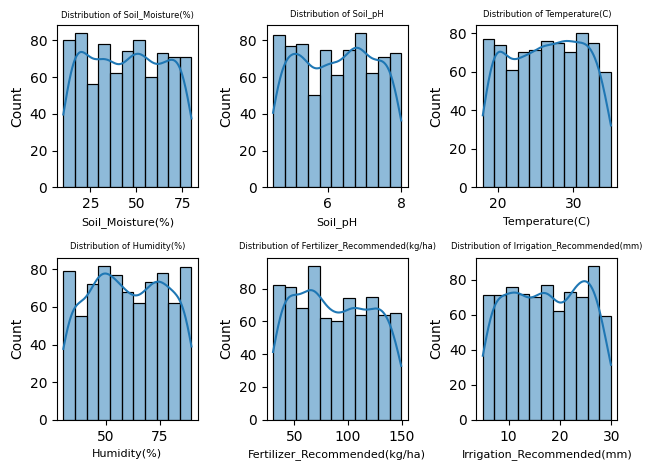

In [83]:
#create histograms for numerical columns
numerical_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for i, col in enumerate(numerical_cols):
   plt.subplot(2, 3, i + 1)
   sns.histplot(df_cleaned[col], kde=True)
   plt.title(f'Distribution of {col}', fontsize = 6)
   plt.xlabel(col, fontsize = 8)
plt.tight_layout()
plt.show()

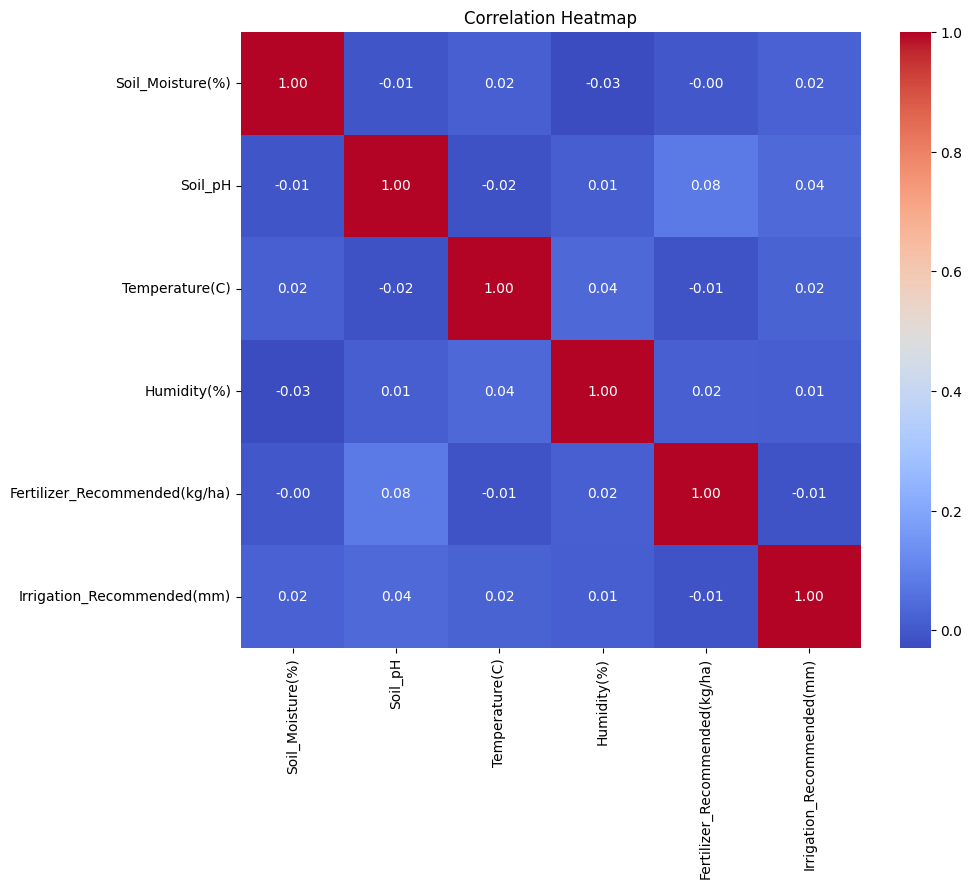

In [79]:
#create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

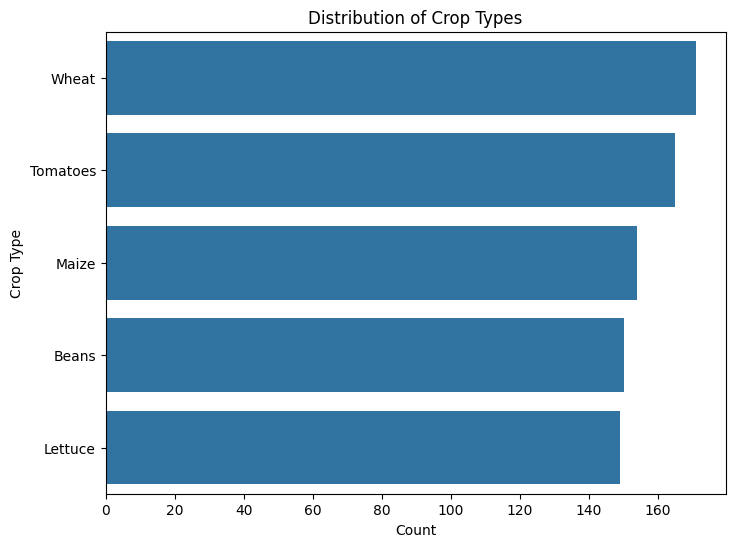

In [72]:
#analyze the distribution of 'Crop_Type'
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, y='Crop_Type', order=df_cleaned['Crop_Type'].value_counts().index)
plt.title('Distribution of Crop Types')
plt.xlabel('Count')
plt.ylabel('Crop Type')
plt.show()

In [73]:
#calculate the average values of numerical features for each crop type
avg_values = df_cleaned.groupby('Crop_Type')[numerical_cols].mean()
print("Average Values of Numerical Features by Crop Type:")
print(avg_values)
#save the cleaned and preprocessed data to a new CSV file
df_cleaned.to_csv('cleaned_climate_action_data.csv', index=False)
print("Cleaned data saved to 'cleaned_climate_action_data.csv'")
#end of the script
#evaluate the model performance using appropriate metrics
#identify patterns and correlations
#save the cleaned and preprocessed data
# The script has completed the data cleaning and preprocessing steps.
# It has also visualized the data to understand trends and distributions

Average Values of Numerical Features by Crop Type:
           Soil_Moisture(%)   Soil_pH  Temperature(C)  Humidity(%)  \
Crop_Type                                                            
Beans             44.332133  6.292333       26.900667    59.581333   
Lettuce           42.916980  6.381074       26.152349    60.746980   
Maize             44.952078  6.181104       27.012987    57.979870   
Tomatoes          44.179333  6.325455       26.210909    60.921212   
Wheat             47.195731  6.073801       26.129825    61.038012   

           Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
Crop_Type                                                             
Beans                          83.888000                   17.999333  
Lettuce                        87.894631                   17.008725  
Maize                          88.500000                   16.637013  
Tomatoes                       88.824848                   17.624242  
Wheat                          8